In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#globaltemp["Year"]=globaltemp["YEAR"].dt.year
#globaltemp=globaltemp[globaltemp.Year>=1850]
#globaltemp["Year"]=pd.to_datetime(globaltemp["Year"])

In [2]:
globaltemp=pd.read_csv('DataSet/GlobalTemperatures 2.csv',parse_dates=['dt','YEAR'])
date = globaltemp['YEAR']
globaltemp.shape

(1992, 18)

In [3]:
globaltemp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'YEAR', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

In [4]:
globaltemp=globaltemp.drop(columns=['YEAR','Unnamed: 9','LandAndOceanAverageTemperatureUncertainty','LandMinTemperatureUncertainty','LandAverageTemperatureUncertainty','LandMaxTemperatureUncertainty','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17'],axis=1)

In [5]:
globaltemp.isnull().sum()

dt                                0
LandAverageTemperature            0
LandMaxTemperature                0
LandMinTemperature                0
LandAndOceanAverageTemperature    0
dtype: int64

In [6]:

def wrangle(df):

#For fahrenheit values
#     def convertTemp(x):
#         x=(x*1.8)+32
#         return float(x)



#     df['LandAverageTemperature']=df['LandAverageTemperature'].apply(convertTemp)
#     df['LandMaxTemperature']=df['LandMaxTemperature'].apply(convertTemp)
#     df['LandMinTemperature']=df['LandMinTemperature'].apply(convertTemp)
#     df['LandAndOceanAverageTemperature']=df['LandAndOceanAverageTemperature'].apply(convertTemp)
    
    df["dt"]=pd.to_datetime(df["dt"])
    df["Month"]=df["dt"].dt.month
    df["Year"]=df["dt"].dt.year
    df=df.drop("dt",axis=1)
    df=df.drop("Month",axis=1)
    df=df[df.Year>=1850]
    df=df.set_index(['Year'])
    #date=df.iloc[:,:0]
    
    
    df=df.dropna()
    
    return df




In [7]:
globaltemp=wrangle(globaltemp)

In [8]:
globaltemp.columns

Index(['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature',
       'LandAndOceanAverageTemperature'],
      dtype='object')

In [9]:
globaltemp.shape

(1992, 4)

In [10]:
globaltemp.isnull().sum()

LandAverageTemperature            0
LandMaxTemperature                0
LandMinTemperature                0
LandAndOceanAverageTemperature    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

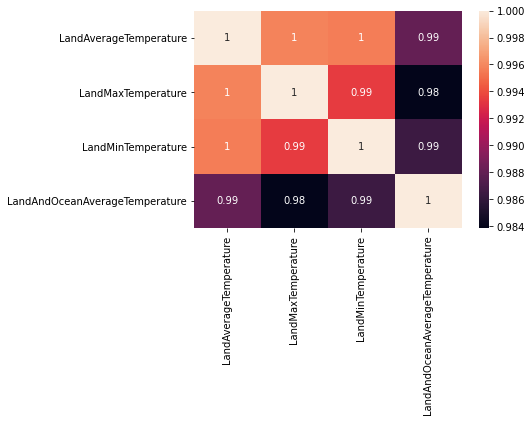

In [11]:
corrmatrix=globaltemp.corr()
sns.heatmap(corrmatrix,annot=True)
plt.show

In [12]:
target='LandAndOceanAverageTemperature'
y=globaltemp[target]
x=globaltemp[['LandAverageTemperature','LandMaxTemperature','LandMinTemperature']]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1494, 3)
(498, 3)
(1494,)
(498,)


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

forestmodel=make_pipeline(
    SelectKBest(k="all"),
    StandardScaler(),
    RandomForestRegressor(
                            n_estimators=100,
                            max_depth=50,
                            random_state=77)
)



forestmodel.fit(x_train,y_train)


Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, random_state=77))])

In [16]:
y_pred=forestmodel.predict(x_test)

errors=abs(y_pred-y_test)
mape=100*(errors/y_train)
accuracy=100-np.mean(mape)
print("Random Forest Regressor Model Prediction Accuracy",round(accuracy,2),"%.")

Random Forest Regressor Model Prediction Accuracy 99.1 %.


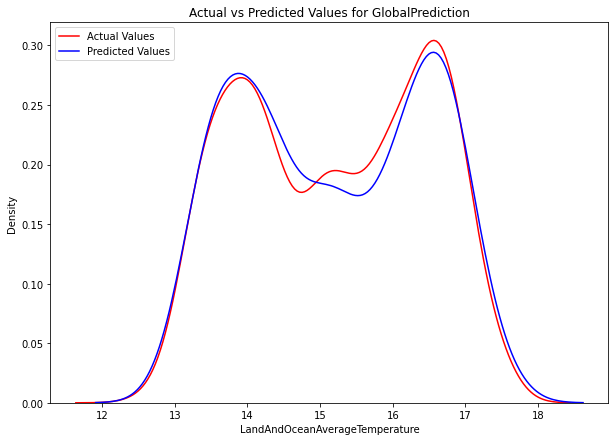

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(10, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Values")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax )
plt.title('Actual vs Predicted Values for GlobalPrediction')

plt.legend(loc="upper left")

plt.show()
plt.close()
plt.savefig("Actual vs Predicted Values for GlobalPrediction")

In [30]:
year_temp=[]
for i in range(len(date)):
    year_temp.append(date[i].year)
year_temp = np.array(year_temp)
year_temp = year_temp.reshape(-100,1)

In [31]:
poly_reg = PolynomialFeatures(degree = 3)
year_tempp=poly_reg.fit_transform(year_temp)
poly_reg.fit(year_tempp,y)

PolynomialFeatures(degree=3)

In [32]:
forestmodel.fit(year_tempp, y)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, random_state=77))])

In [33]:
print(forestmodel.predict(poly_reg.fit_transform([[2015]])))

[16.08097981]


In [34]:
z = forestmodel.predict(poly_reg.fit_transform(year_temp))

from sklearn.metrics import mean_squared_error
print("The Mean Squared Error is ",round(mean_squared_error(y, z),4))

The Mean Squared Error is  1.5353


In [35]:
year_tempp=poly_reg.fit_transform(year_temp)
poly_reg.fit(year_tempp,y)

PolynomialFeatures(degree=3)

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(year_tempp, y)

LinearRegression()

In [37]:
print(lin_reg.predict(poly_reg.fit_transform([[2015]])))

[15.89770826]


In [38]:
z = lin_reg.predict(poly_reg.fit_transform(year_temp))
print("The Mean Squared Error is ",round(mean_squared_error(y, z),4))

The Mean Squared Error is  1.5478
